In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\Suicide Prediction\master.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
data.drop('HDI for year', axis=1, inplace= True)
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [8]:
# We dropped two columns
# HDI for year: Because it had more than 19000 null values
#Country-year : we already have seperate columns

In [9]:
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [10]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [11]:
data.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [13]:
data.country.nunique()

101

In [14]:
data.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

# Observation:

1. We dropped two columns
2. age, generation, sex need to be LabelEncode

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'suicides_no'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'suicides/100k pop'}>],
       [<AxesSubplot: title={'center': 'gdp_per_capita ($)'}>,
        <AxesSubplot: >]], dtype=object)

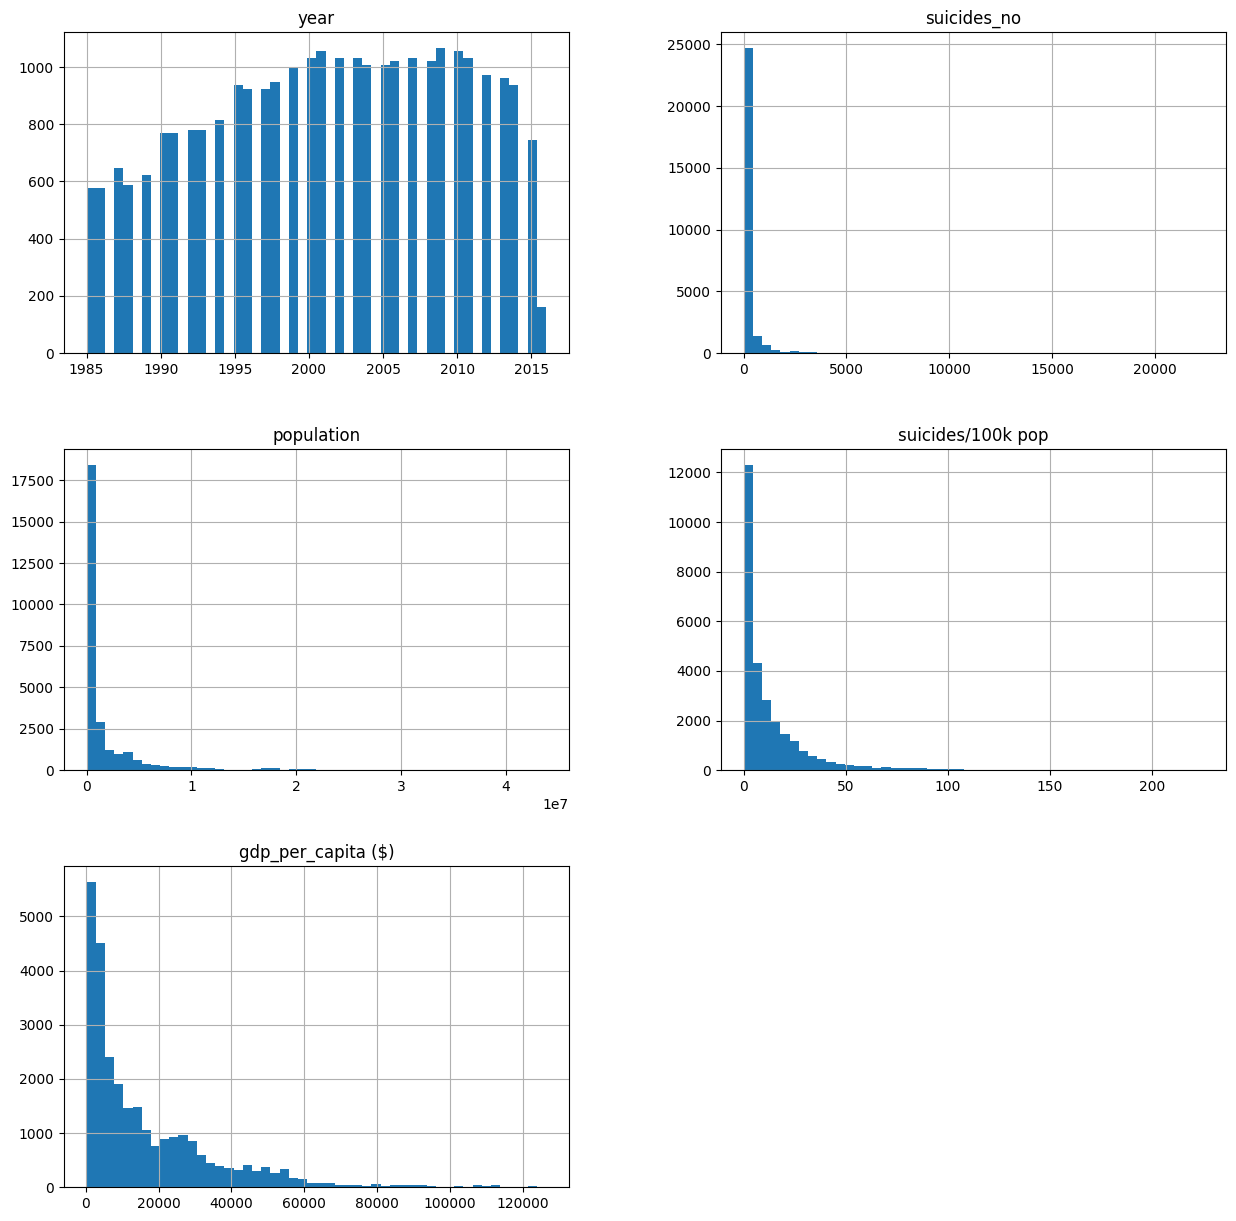

In [18]:
data.hist(bins=50, figsize=(15,15))

C:\Users\SANKET\AppData\Local\Temp\ipykernel_9648\2819209079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

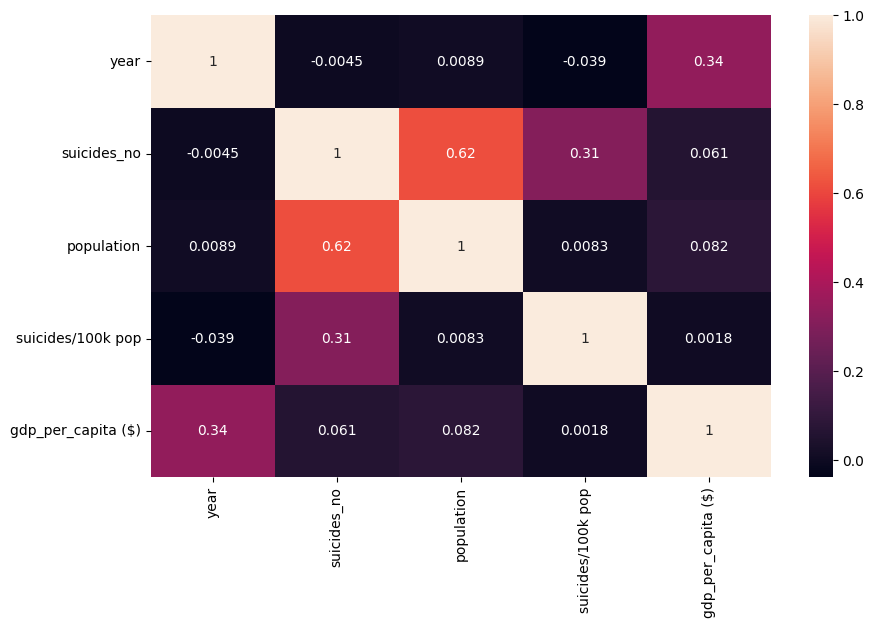

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

In [23]:
import warnings
warnings.filterwarnings('ignore')

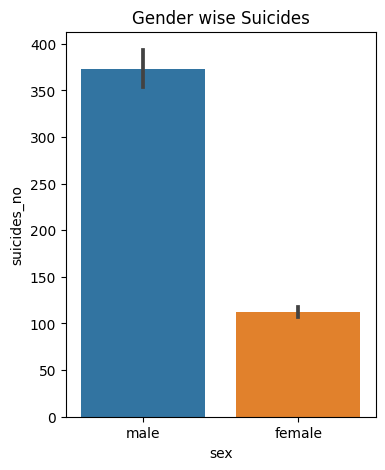

In [36]:
plt.figure(figsize=(4,5))
sns.barplot(y=data['suicides_no'], x=data['sex'])
plt.title('Gender wise Suicides')
plt.show()

Text(0.5, 1.0, 'Generation wise suicides')

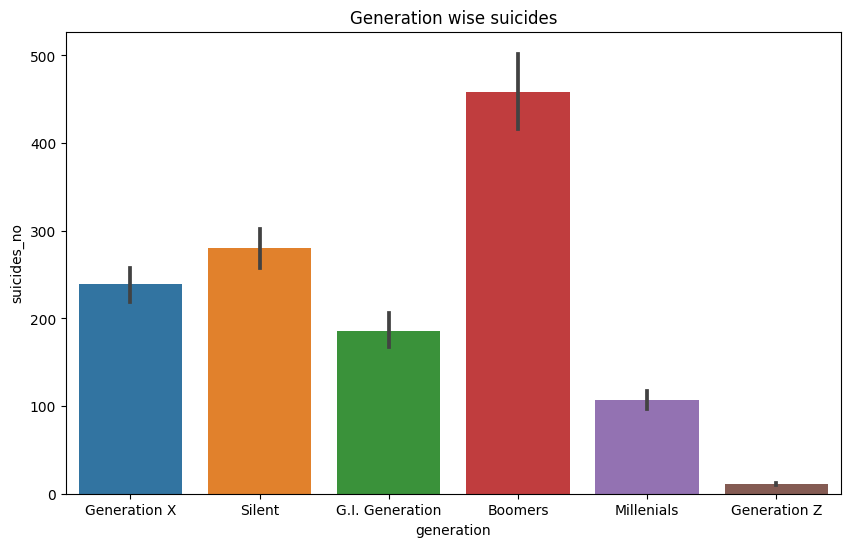

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x= data['generation'], y= data['suicides_no'])
plt.title('Generation wise suicides')

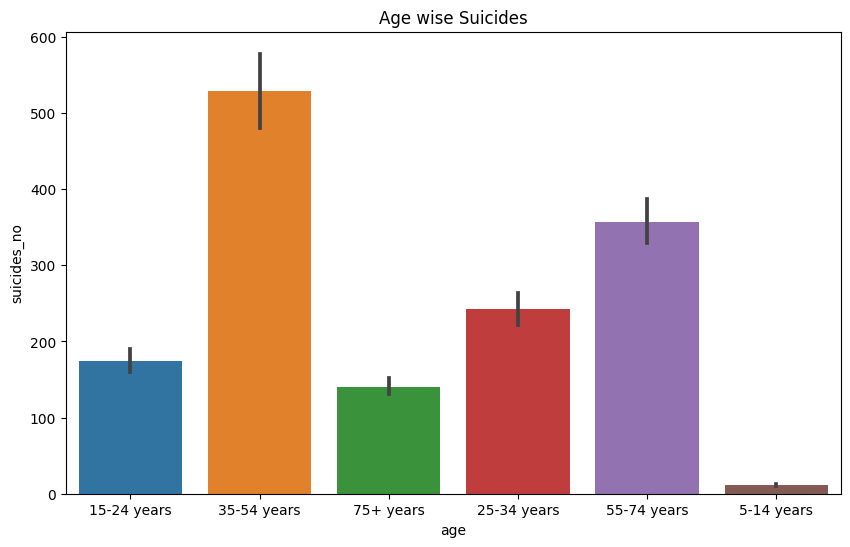

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x= data.age, y= data.suicides_no)
plt.title('Age wise Suicides')
plt.show()

Text(0.5, 1.0, 'Age group and Sex wise suicides')

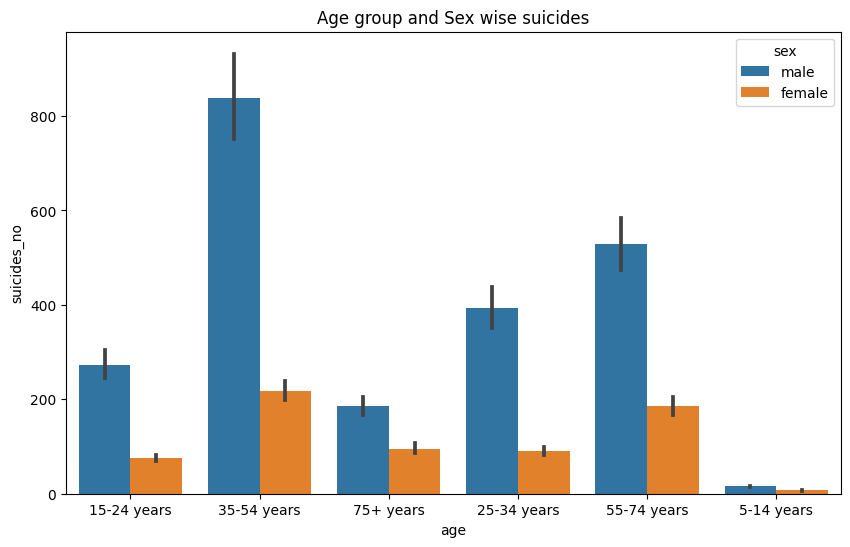

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.age, y=data.suicides_no, hue=data.sex)
plt.title('Age group and Sex wise suicides')

# Observations:

1. Male have more number of suicides than Women
2. 35-54 age group have more number of suicides followed by 55-74 age group
3. boomer generation are consist of most number of suicides

<AxesSubplot: xlabel='suicides_no', ylabel='country'>

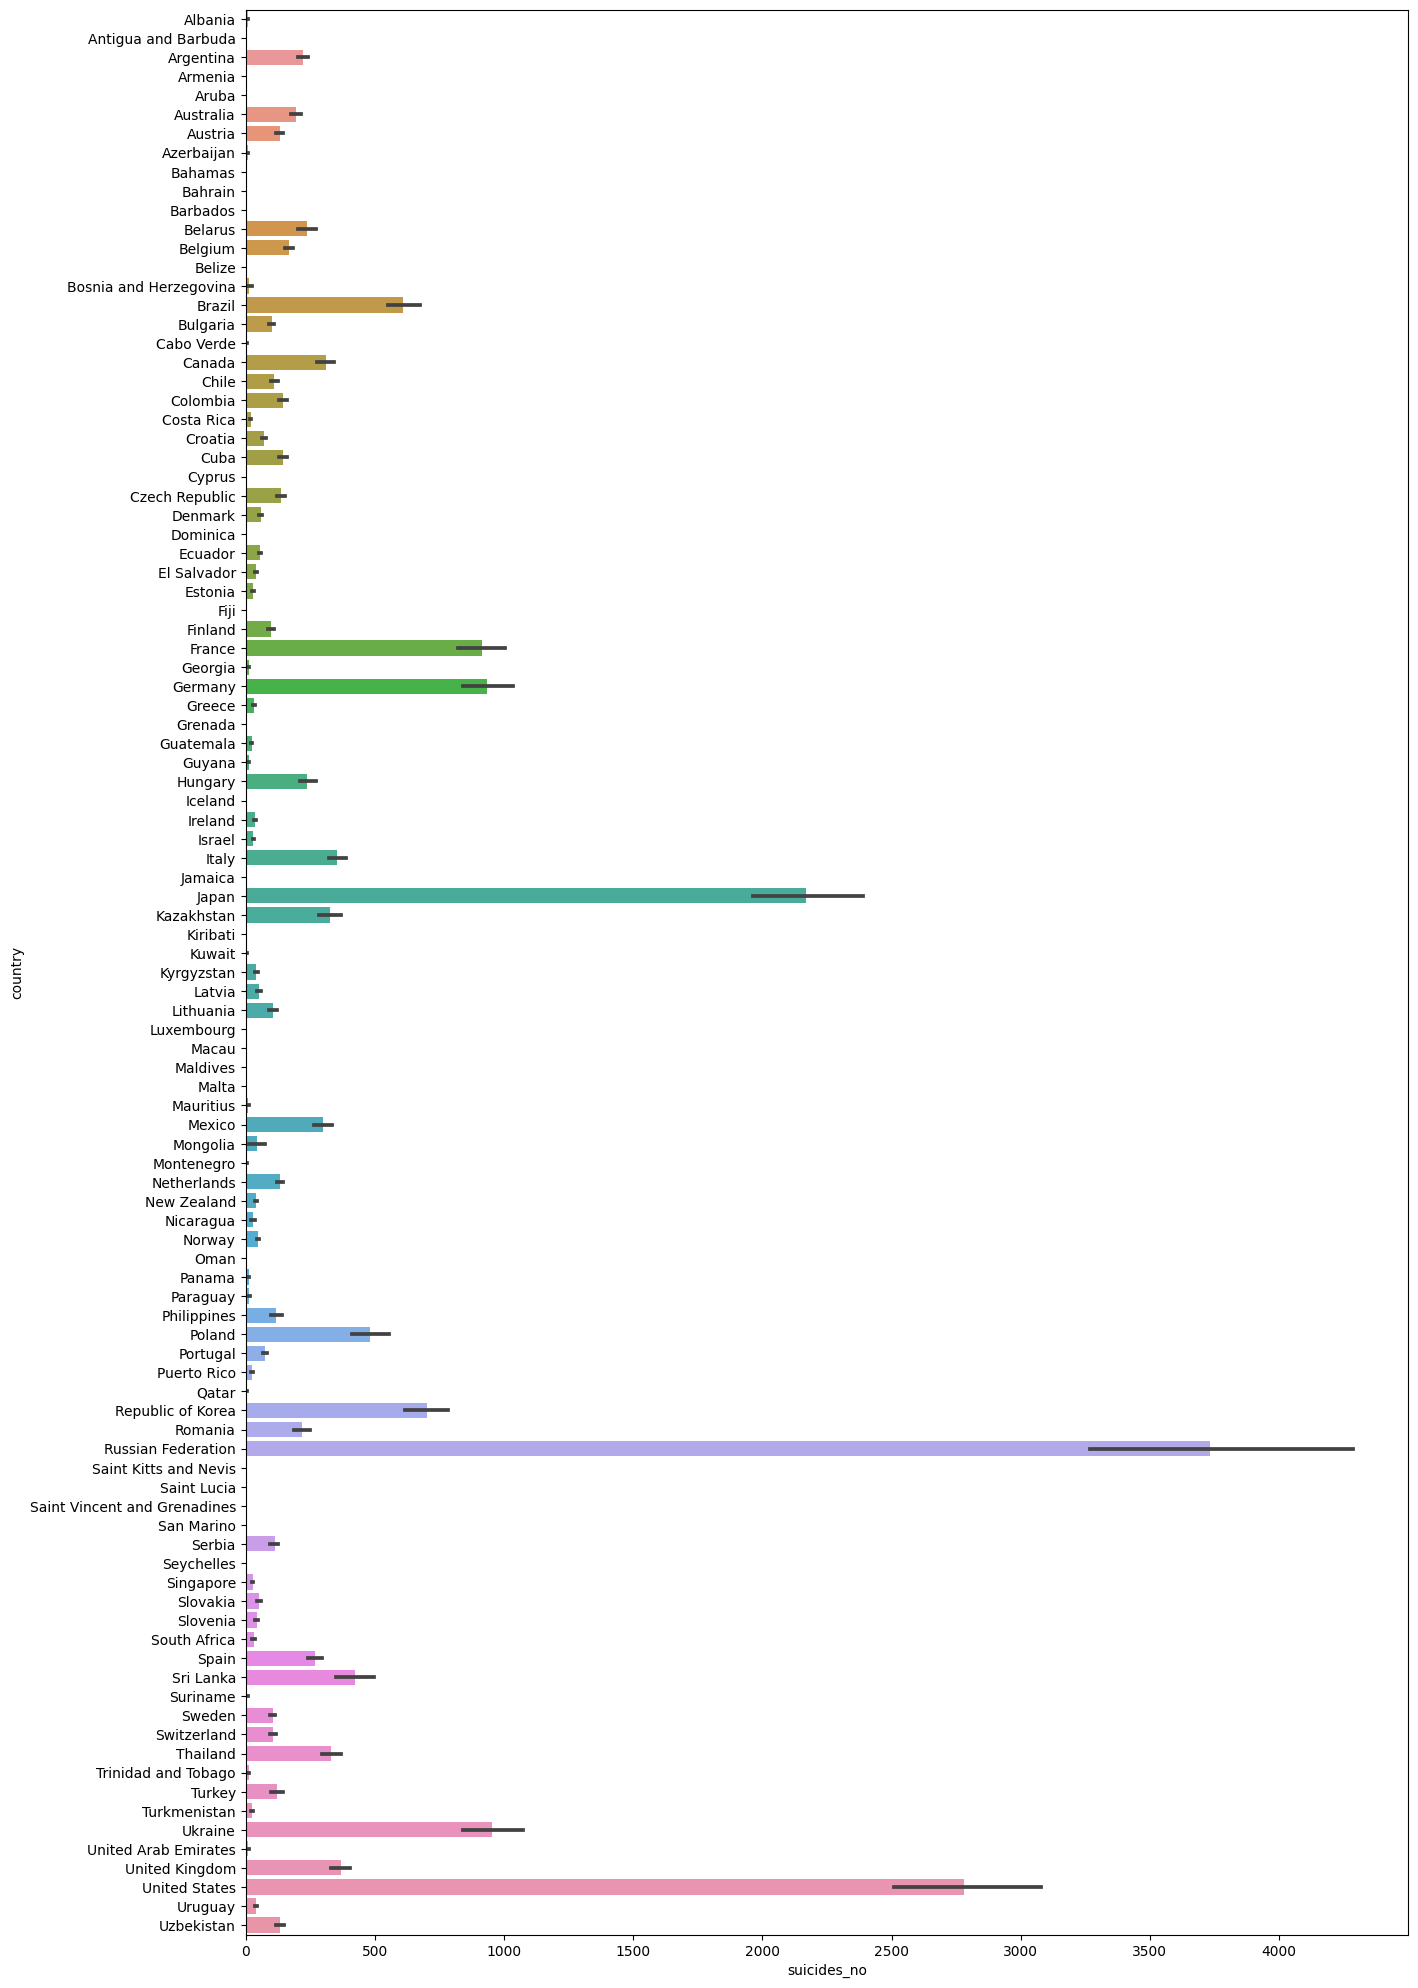

In [52]:
plt.figure(figsize=(15,25))
sns.barplot(y=data.country, x=data.suicides_no)


Text(0.5, 1.0, 'Suicides as per Year and sex')

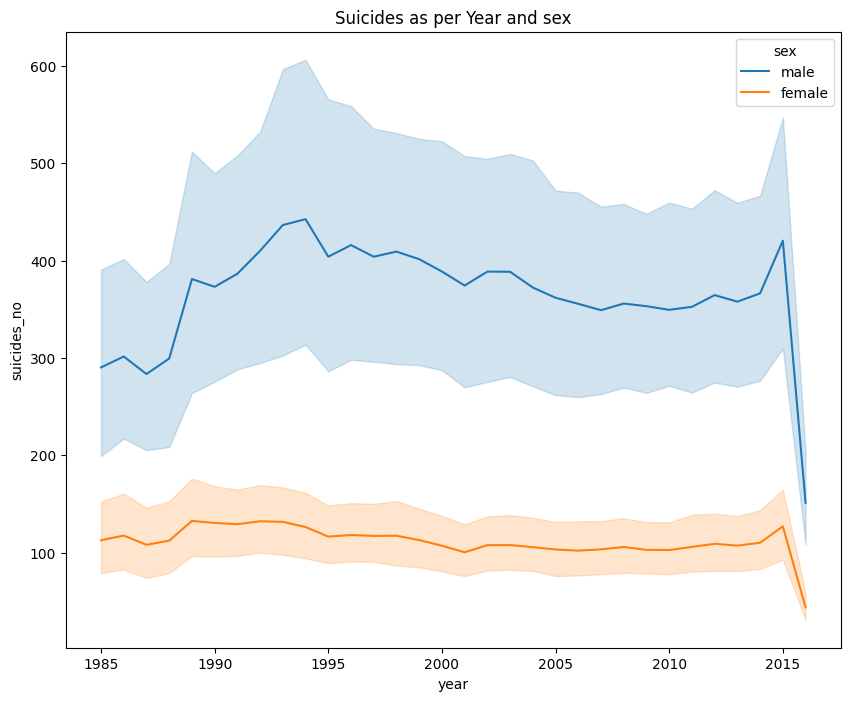

In [56]:
plt.figure(figsize=(10,8))
sns.lineplot(x=data.year, y=data.suicides_no, hue=data.sex)
plt.title('Suicides as per Year and sex')

In [59]:
data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 
                'population', 'suicide_rate',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

array([[<AxesSubplot: xlabel='year', ylabel='year'>,
        <AxesSubplot: xlabel='suicide_count', ylabel='year'>,
        <AxesSubplot: xlabel='population', ylabel='year'>,
        <AxesSubplot: xlabel='suicide_rate', ylabel='year'>,
        <AxesSubplot: xlabel='gdp_per_capita', ylabel='year'>],
       [<AxesSubplot: xlabel='year', ylabel='suicide_count'>,
        <AxesSubplot: xlabel='suicide_count', ylabel='suicide_count'>,
        <AxesSubplot: xlabel='population', ylabel='suicide_count'>,
        <AxesSubplot: xlabel='suicide_rate', ylabel='suicide_count'>,
        <AxesSubplot: xlabel='gdp_per_capita', ylabel='suicide_count'>],
       [<AxesSubplot: xlabel='year', ylabel='population'>,
        <AxesSubplot: xlabel='suicide_count', ylabel='population'>,
        <AxesSubplot: xlabel='population', ylabel='population'>,
        <AxesSubplot: xlabel='suicide_rate', ylabel='population'>,
        <AxesSubplot: xlabel='gdp_per_capita', ylabel='population'>],
       [<AxesSubplot: xlabel

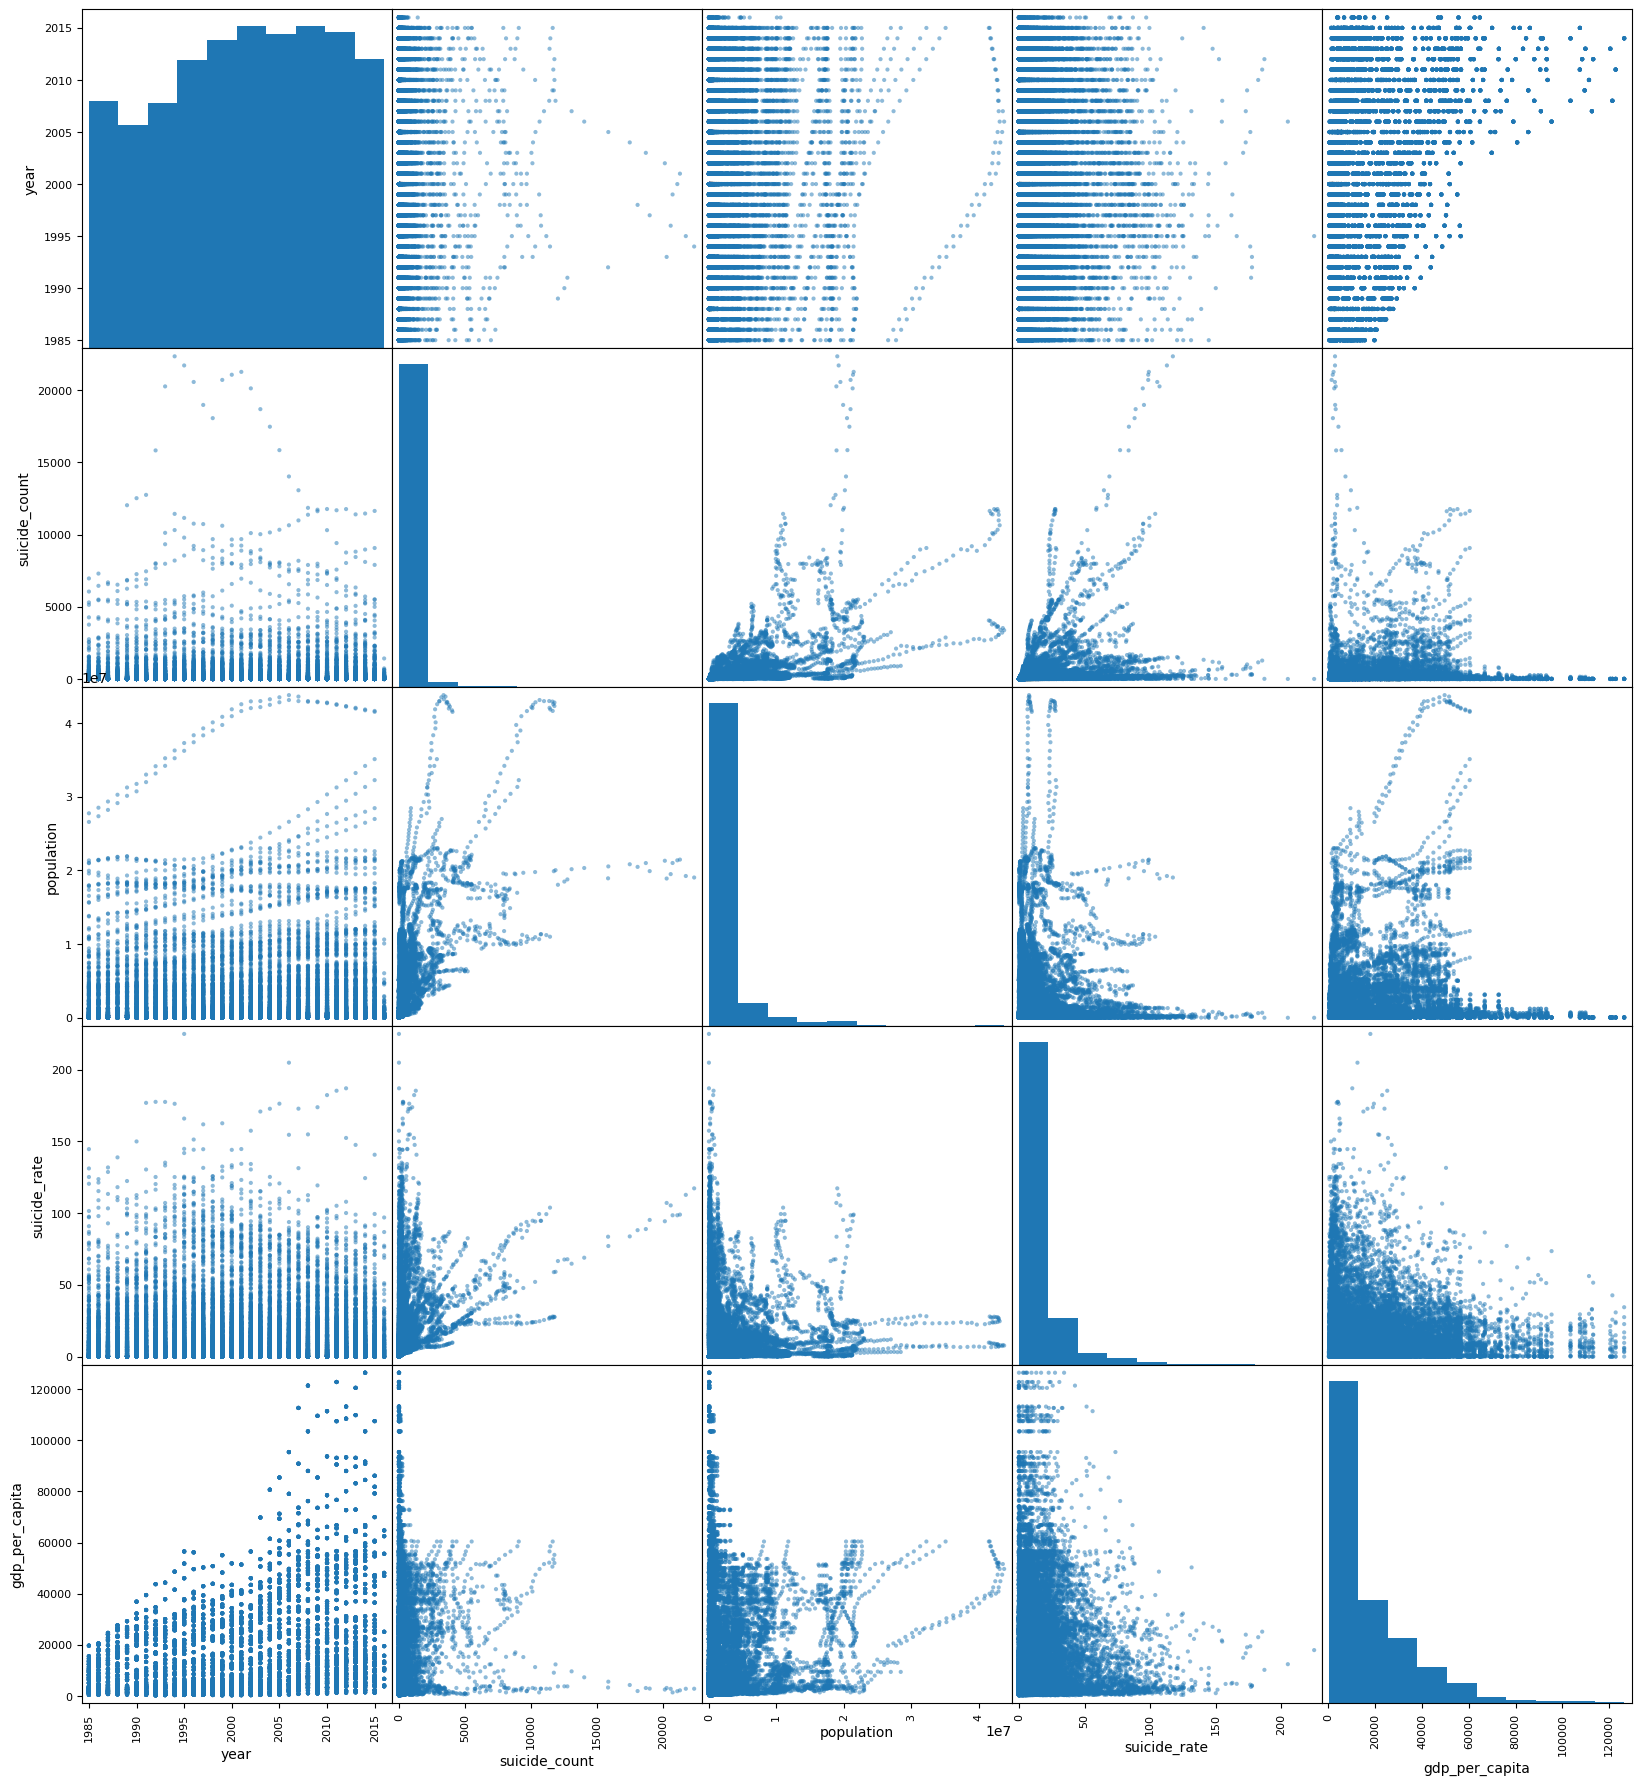

In [65]:

attributes = ['country', 'year', 'gender', 'age_group', 'suicide_count','population', 'suicide_rate','gdp_for_year', 'gdp_per_capita', 'generation']
scatter_matrix(data[attributes], figsize=(20,22))


In [69]:
from sklearn.preprocessing import LabelEncoder

categorical = ['country', 'year','age_group', 'gender', 'generation']

encoder = LabelEncoder()

for col in categorical:
    data[col] = encoder.fit_transform(data[col])
    
    
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [70]:
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,2.156625e+09,796,2
1,0,2,1,2,16,308000,5.19,2.156625e+09,796,5
2,0,2,0,0,14,289700,4.83,2.156625e+09,796,2
3,0,2,1,5,1,21800,4.59,2.156625e+09,796,1
4,0,2,1,1,9,274300,3.28,2.156625e+09,796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,6.306708e+10,2309,2
27816,100,29,0,5,9,348465,2.58,6.306708e+10,2309,5
27817,100,29,1,3,60,2762158,2.17,6.306708e+10,2309,3
27818,100,29,0,3,44,2631600,1.67,6.306708e+10,2309,3


In [72]:
# We need to standardization over normalization due to distribution of outliers
from sklearn.preprocessing import StandardScaler

stand = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

scaler = StandardScaler()

data[stand] = scaler.fit_transform(data[stand])

In [73]:
data.head(3)

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.245639,-0.391617,-0.322032,-0.305056,-0.850864,2
1,0,2,1,2,-0.251182,-0.392870,-0.402196,-0.305056,-0.850864,5
2,0,2,0,0,-0.253400,-0.397548,-0.421182,-0.305056,-0.850864,2


# Splitting Data

In [74]:
y = data['suicide_rate']
X = data.drop('suicide_rate', axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=10)

X_train.shape, X_val.shape

((22256, 9), (5564, 9))

# Model Building

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_1 = RandomForestRegressor(max_depth=9)

model_1.fit(X_train, y_train)

train_pred = model_1.predict(X_train)
test_pred = model_1.predict(X_val)

train_score = model_1.score(X_train, y_train)
test_score = model_1.score(X_val, y_val)

rmse_train_score = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test_score = np.sqrt(mean_squared_error(y_val, test_pred))


print('Random Forest(Acuuracy on Training) :{:.4f}'.format(train_score))
print('Random Forest(Accuracy on Test): {:.4f}'.format(test_score))

print('\nRandom Forest (RMSE of Training):', rmse_train_score)
print('Random Forest ( RMSE of Test):', rmse_test_score)

Random Forest(Acuuracy on Training) :0.9866
Random Forest(Accuracy on Test): 0.9793

Random Forest (RMSE of Training): 0.11574178592360905
Random Forest ( RMSE of Test): 0.14463381210468987


In [91]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.2, max_depth=4)

xgb.fit(X_train, y_train)

xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_val)

xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_val, y_val)

rmse_xgb_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
rmse_xgb_test = np.sqrt(mean_squared_error(y_val, xgb_pred_test))

print('XGBRegressor (Accuracy score on Training): {:.4f}'.format(xgb_train_score))
print('XGBRegressor (Accuracy score on Test): {:.4f}'.format(xgb_test_score))

print('\nXGBRegressor (RMSE on Training)', rmse_xgb_train)
print('XGBRegressor (RMSE on Test)', rmse_xgb_test)

XGBRegressor (Accuracy score on Training): 0.9937
XGBRegressor (Accuracy score on Test): 0.9888

XGBRegressor (RMSE on Training) 0.07954853163942006
XGBRegressor (RMSE on Test) 0.1061008024284131
